## Васильев Семён. 520 группа

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.stattools as st

import matplotlib.pyplot as plt
%matplotlib inline

/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
def autocorr(ts, lags=15):
    fig, ax = plt.subplots(figsize=(14, 7))
    sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax, adjusted=True, alpha=0.05)
    plt.show()

In [3]:
def autopartcorr(ts, lags=15):
    fig, ax = plt.subplots(figsize=(14, 7))
    sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=ax, alpha=0.05)
    plt.show()

In [4]:
data = pd.read_csv('data.csv')
data.index = data.date
data.drop(['date'], axis=1, inplace=True)
data

,gasoline
date,
2017-03-13,2.434
2017-03-20,2.433
2017-03-27,2.428
2017-04-03,2.471
2017-04-10,2.534
...,...
2022-01-31,3.464
2022-02-07,3.538
2022-02-14,3.581


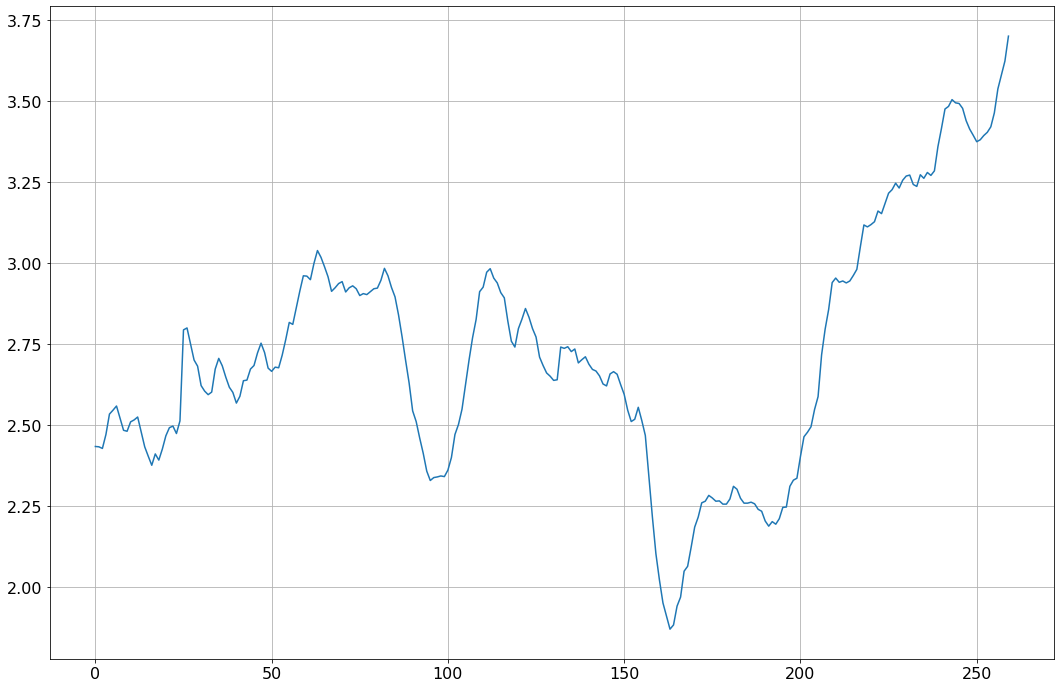

In [5]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(18, 12))
plt.grid()

plt.plot(data.values)

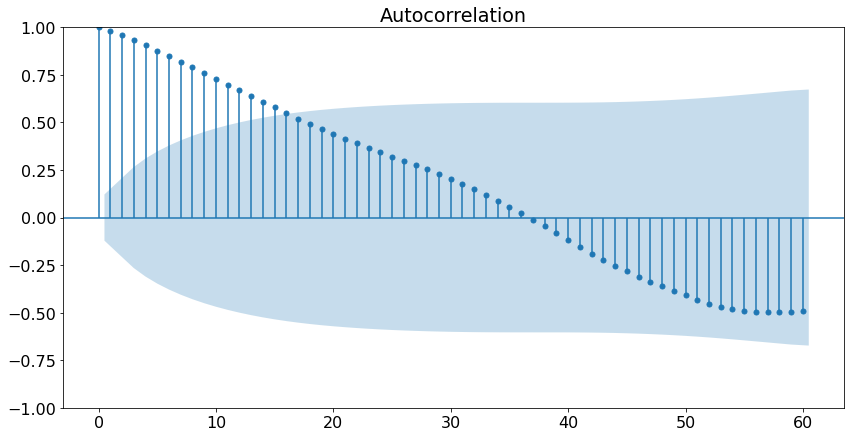

In [6]:
autocorr(data, lags=60)

/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


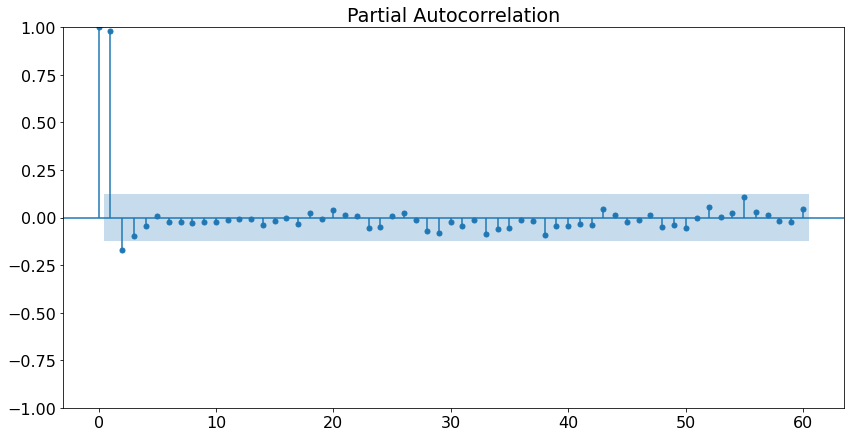

In [7]:
autopartcorr(data, lags=60)

In [8]:
from prophet import Prophet

/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [9]:
df = pd.DataFrame({'ds': data.index, 'y': data.gasoline})
df.index = list(range(df.shape[0]))
df

,ds,y
0,2017-03-13,2.434
1,2017-03-20,2.433
2,2017-03-27,2.428
3,2017-04-03,2.471
4,2017-04-10,2.534
...,...,...
255,2022-01-31,3.464
256,2022-02-07,3.538
257,2022-02-14,3.581
258,2022-02-21,3.624


In [10]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.9053


/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       650.632     0.0156122       159.948           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       652.029   0.000297088       102.562   2.824e-06       0.001      194  LS failed, Hessian reset 
     170       653.994   0.000544614       134.555   2.002e-06       0.001      292  LS failed, Hessian reset 
     199       654.916    0.00118359       114.083           1           1      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       655.838    0.00362493        86.203           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     327       656.011   0.000115277       62.9775   1.963e-06       0.001      517  LS failed, Hessian reset 
     399        656.18   1.63228e-05  

In [11]:
from prophet.diagnostics import cross_validation

In [12]:
cv_res = cross_validation(m, initial='1400 days', period='84 days', horizon = '84 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2021-03-29 00:00:00 and 2021-12-06 00:00:00
  0%|                                                     | 0/4 [00:00<?, ?it/s]/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -3.52114
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       460.213    0.00357934        72.795      0.9744      0.9744      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     198       463.357   4.65296e-06       69.5249   6.181e-08       0.001      284  LS failed, Hessian reset 
     199       463.357   3.86508e-06       82.4448           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       463.357    2.1102e-08       70.4243      0.5732     0.05732      312   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 25%|███████████▎                                 | 1/4 [00:00<00:02,  1.08it/s]/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.app

Initial log joint probability = -3.96882
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       498.643   0.000726875       113.111   3.651e-06       0.001      149  LS failed, Hessian reset 
      99        499.74    0.00517886       163.016      0.2556      0.5748      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       501.932   0.000750103       79.8314   1.146e-05       0.001      249  LS failed, Hessian reset 
     199       502.508   0.000309878        64.983           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       503.239    0.00211826       64.6667           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     364        504.42   0.000481073       86.1615   4.128e-06       0.001      586  LS failed, Hessian rese

 50%|██████████████████████▌                      | 2/4 [00:01<00:01,  1.07it/s]/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.08308
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       547.405    0.00270663       117.818      0.2443           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       549.722   0.000412421       76.5113    5.61e-06       0.001      244  LS failed, Hessian reset 
     199       549.879    0.00305134        76.107      0.7863      0.7863      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       549.963   0.000146357       74.4164    2.17e-06       0.001      373  LS failed, Hessian reset 
     299       550.058   7.37753e-06       56.5664      0.3613           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322        550.06   1.76976e-05       77.1881   2.768e-07       0.001      504  LS failed, Hessian rese

 75%|█████████████████████████████████▊           | 3/4 [00:02<00:00,  1.08it/s]/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/svasilyev/anaconda3/envs/temp/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.29244
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       599.917    0.00189566       101.844      0.5864      0.5864      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       602.222    0.00029183       78.9725      0.6329      0.6329      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286       604.849   0.000285671       87.0481   2.836e-06       0.001      404  LS failed, Hessian reset 
     299       605.007   0.000350252       49.1384      0.2228           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       605.045    8.3385e-05       75.9218    1.19e-06       0.001      524  LS failed, Hessian reset 
     399       605.059   9.63905e-06        49.693      0.3472      0.9952      590   
    Iter      log pro

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.05it/s]


In [13]:
cv_res

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-04-05,2.498338,2.291646,2.733337,2.945,2021-03-29
1,2021-04-12,2.494706,2.260280,2.715725,2.939,2021-03-29
2,2021-04-19,2.504446,2.279911,2.721642,2.945,2021-03-29
3,2021-04-26,2.517259,2.304283,2.746955,2.962,2021-03-29
4,2021-05-03,2.527458,2.300717,2.749473,2.981,2021-03-29
5,2021-05-10,2.538593,2.318979,2.756195,3.051,2021-03-29
6,2021-05-17,2.556023,2.340290,2.755066,3.118,2021-03-29
7,2021-05-24,2.576992,2.369384,2.795426,3.112,2021-03-29
8,2021-05-31,2.590465,2.371522,2.804919,3.119,2021-03-29
9,2021-06-07,2.587647,2.375562,2.824260,3.128,2021-03-29


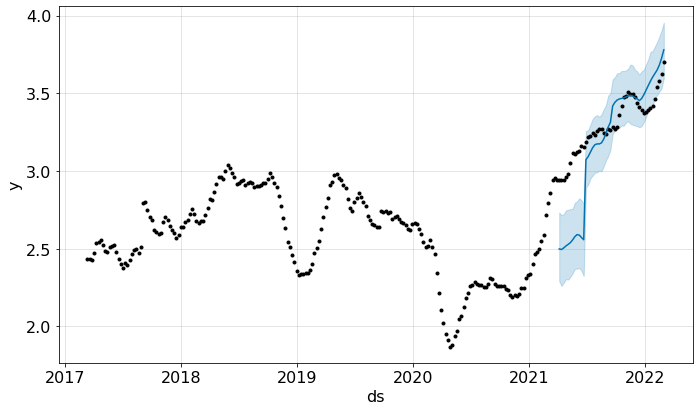

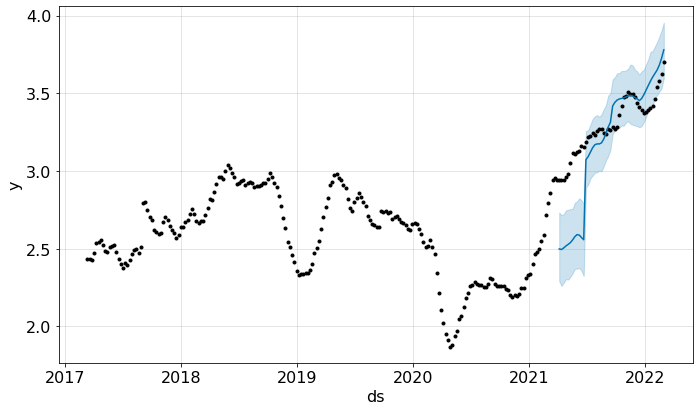

In [14]:
m.plot(cv_res)

In [15]:
np.mean((cv_res['y'][-12:] - cv_res['yhat'][-12:])**2)

0.016061050304844175